## Anora

In [52]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv('API_KEY')
client_id = os.getenv('CLIENT_ID')

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1ggv4yg/official_discussion_anora_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment



### Analyze the Sentiment

In [53]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)



KeyboardInterrupt: 

### Output the results

Positive Comments: 1100
Negative Comments: 331
Neutral Comments: 298


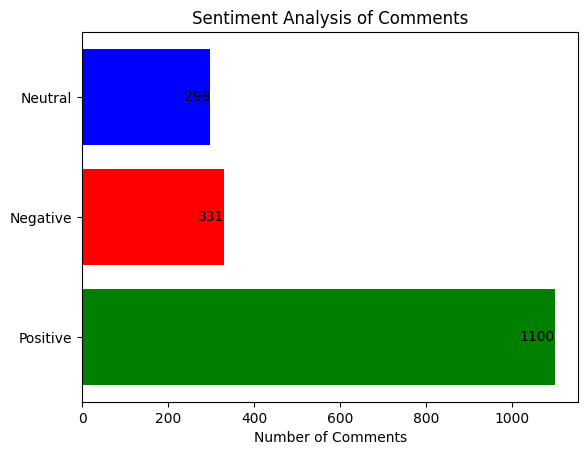

In [13]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Anora?')

plt.show()

## The Brutalist

In [14]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1i37yra/official_discussion_the_brutalist_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the Sentiment

In [15]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 535
Negative Comments: 130
Neutral Comments: 152


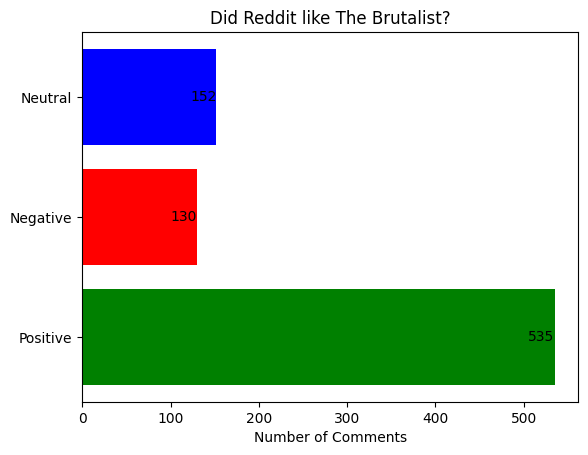

In [16]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like The Brutalist?')

plt.show()

## A complete unknown

In [17]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1hlsi27/official_discussion_a_complete_unknown_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the Sentiment

In [18]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 543
Negative Comments: 125
Neutral Comments: 173


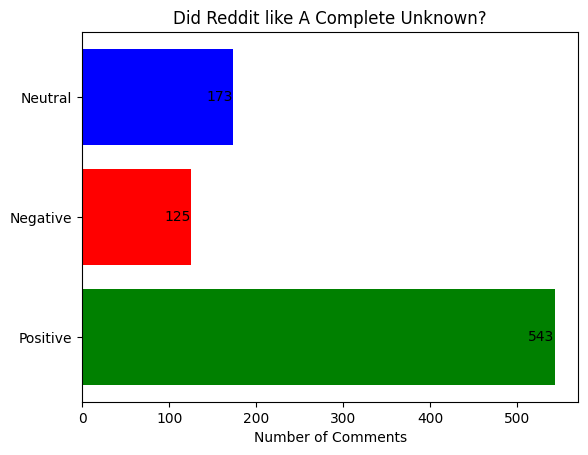

In [20]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like A Complete Unknown?')

plt.show()

## Conclave

In [21]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1gbjlm7/official_discussion_conclave_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the Sentiment

In [22]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 740
Negative Comments: 230
Neutral Comments: 306


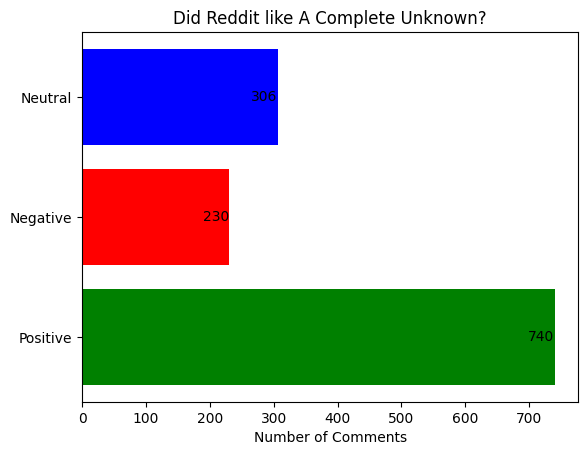

In [23]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Conclave?')

plt.show()

## Dune: Part Two

In [27]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1b3jo9s/official_discussion_dune_part_two_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the sentiment

In [28]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 7417
Negative Comments: 2331
Neutral Comments: 3119


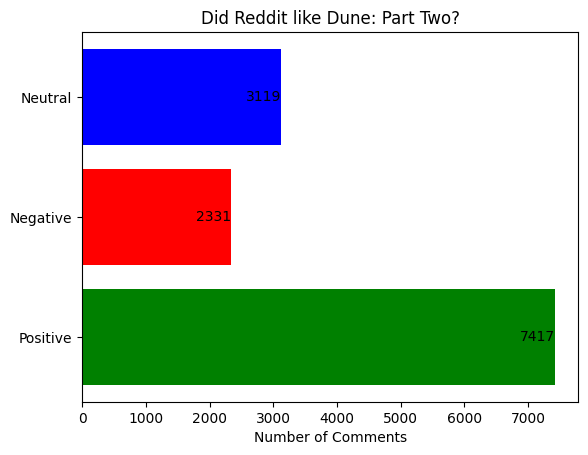

In [29]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Dune: Part Two?')

plt.show()

## Emilia Perez

In [30]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1grn0lz/official_discussion_emilia_p%C3%A9rez_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the sentiment

In [31]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 231
Negative Comments: 115
Neutral Comments: 66


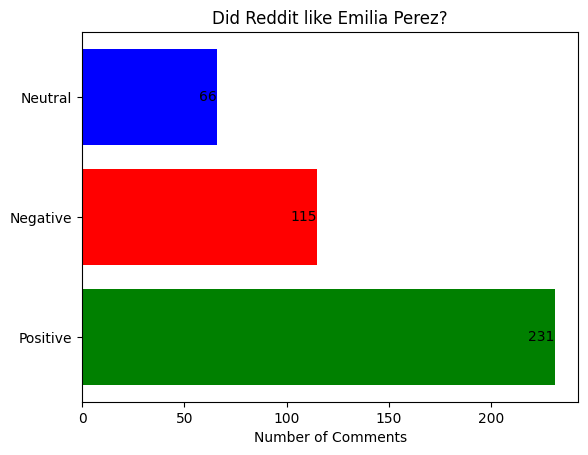

In [33]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Emilia Perez?')

plt.show()

## I'm Still Here

In [34]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1gpzxb2/im_still_here_official_trailer_2025/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

### Analyze the sentiment

In [35]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the result

Positive Comments: 40
Negative Comments: 11
Neutral Comments: 28


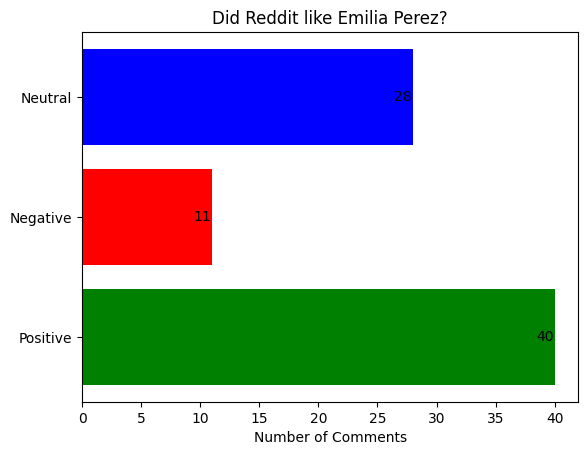

In [36]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Emilia Perez?')

plt.show()


## Nickel Boys

In [37]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1i8m8iz/official_discussion_nickel_boys_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

## Analyze the sentiment

In [38]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the result

Positive Comments: 56
Negative Comments: 11
Neutral Comments: 3


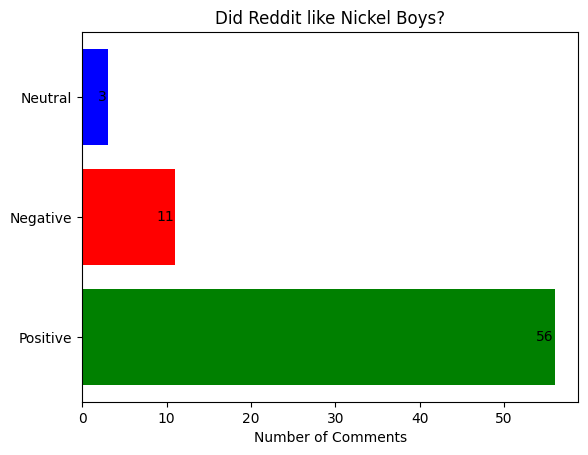

In [39]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Nickel Boys?')

plt.show()

## The Substance

In [40]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1fl1bpl/official_discussion_the_substance_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

## Analyze the sentiment

In [41]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 3359
Negative Comments: 1296
Neutral Comments: 1349


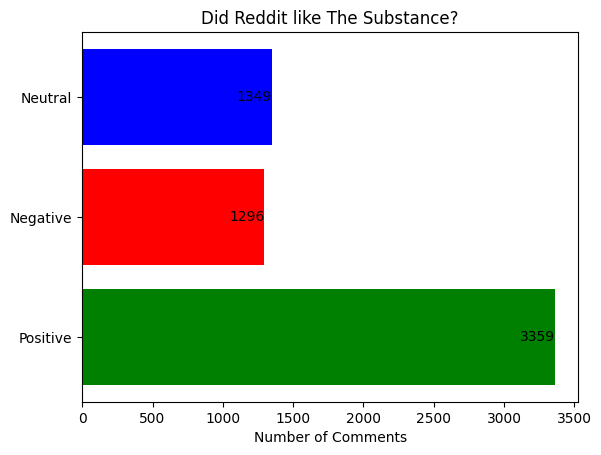

In [42]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like The Substance?')

plt.show()


## Wicked

In [43]:
import praw
from textblob import TextBlob
import requests
import matplotlib.pyplot as plt

# Setup Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Fetch Reddit post comments from the given thread URL
url = 'https://www.reddit.com/r/movies/comments/1gwxxy1/official_discussion_wicked_part_i_spoilers/'
submission = reddit.submission(url=url)


# Function to analyze sentiment
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

## Analyze the sentiment

In [45]:
# Fetch comments and perform sentiment analysis
submission.comments.replace_more(limit=None)
comments = submission.comments.list()
positive_comments = []
negative_comments = []
neutral_comments = []

for comment in comments:
    comment_body = comment.body
    #print(comment_body)
    sentiment_score = analyze_sentiment(comment_body)
    
    # Categorize based on sentiment score
    if sentiment_score > 0:
        positive_comments.append(comment_body)
    elif sentiment_score < 0:
        negative_comments.append(comment_body)
    else:
        neutral_comments.append(comment_body)

### Output the results

Positive Comments: 2063
Negative Comments: 495
Neutral Comments: 676


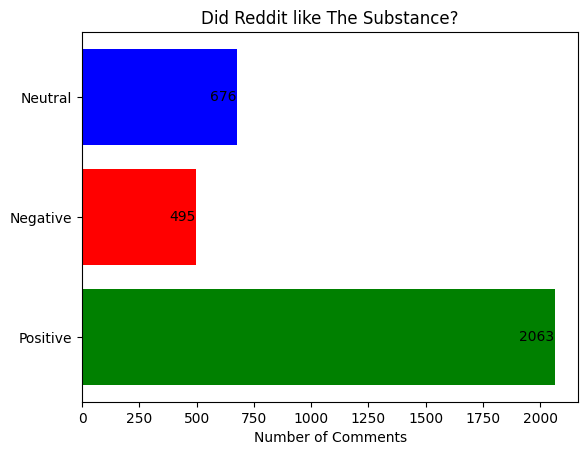

In [46]:
# Output results
print(f"Positive Comments: {len(positive_comments)}")
print(f"Negative Comments: {len(negative_comments)}")
print(f"Neutral Comments: {len(neutral_comments)}")

positive_count = len(positive_comments)
negative_count = len(negative_comments)
neutral_count = len(neutral_comments)

categories = ['Positive', 'Negative', 'Neutral']
counts = [positive_count, negative_count, neutral_count]

fig, ax = plt.subplots()

bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

# Add data labels
for bar in bars:
    width = bar.get_width()
    label_x_pos = width - 0.1 if width > 0 else width + 0.1
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

ax.set_xlabel('Number of Comments')
ax.set_title('Did Reddit like Wicked?')

plt.show()

### Combination of all of the comments

Positive Comments for Anora: 1104
Negative Comments for Anora: 333
Neutral Comments for Anora: 300


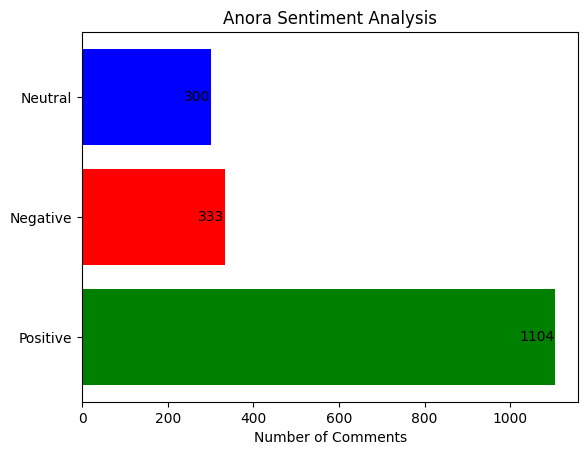

Positive Comments for The Brutalist: 544
Negative Comments for The Brutalist: 135
Neutral Comments for The Brutalist: 166


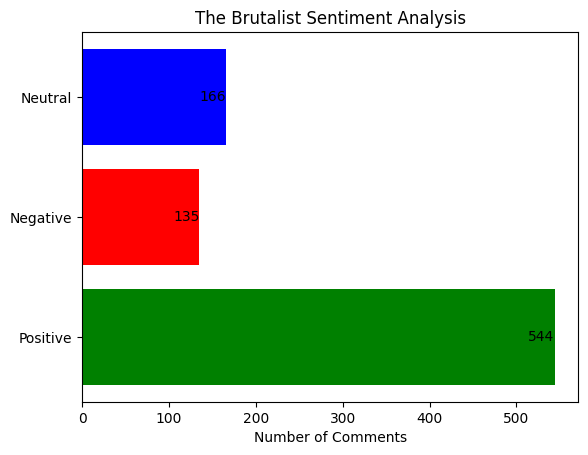

Positive Comments for A Complete Unknown: 547
Negative Comments for A Complete Unknown: 125
Neutral Comments for A Complete Unknown: 173


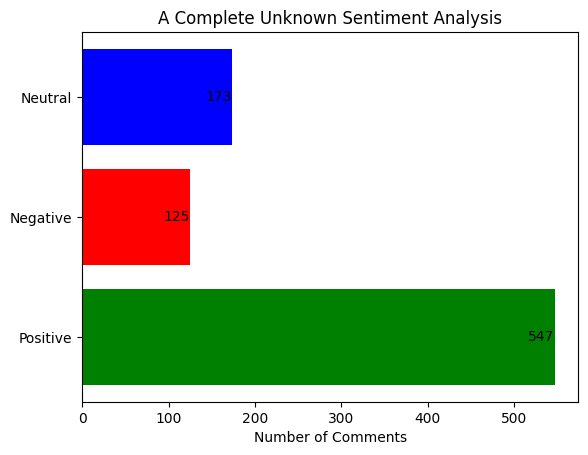

Positive Comments for Conclave: 742
Negative Comments for Conclave: 231
Neutral Comments for Conclave: 310


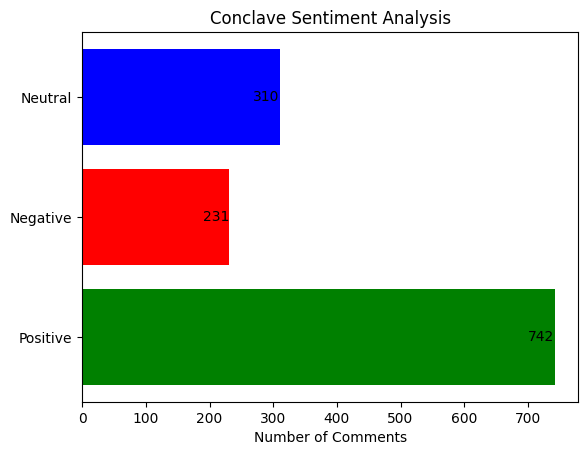

In [ ]:
import praw
import matplotlib.pyplot as plt
from textblob import TextBlob

# Assuming you're using PRAW for Reddit API access
reddit = praw.Reddit(client_id=client_id,
                     client_secret=api_key,
                     user_agent='my_reddit_script_jpherson')

# Define the analyze_sentiment function
def analyze_sentiment(text):
    # Simple sentiment analysis using TextBlob
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity  # Returns a value between -1 and 1
    return sentiment

# The list of movie names and URLs
urls_and_movies = [
    ("Anora", "https://www.reddit.com/r/movies/comments/1ggv4yg/official_discussion_anora_spoilers/"),
    ("The Brutalist", "https://www.reddit.com/r/movies/comments/1i37yra/official_discussion_the_brutalist_spoilers/"),
    ("A Complete Unknown", "https://www.reddit.com/r/movies/comments/1hlsi27/official_discussion_a_complete_unknown_spoilers/"),
    ("Conclave", "https://www.reddit.com/r/movies/comments/1gbjlm7/official_discussion_conclave_spoilers/"),
    ("Dune: Part Two", "https://www.reddit.com/r/movies/comments/1b3jo9s/official_discussion_dune_part_two_spoilers/"),
    ("Emilia Perez", "https://www.reddit.com/r/movies/comments/1grn0lz/official_discussion_emilia_p%C3%A9rez_spoilers/"),
    ("I'm Still Here", "https://www.reddit.com/r/movies/comments/1gpzxb2/im_still_here_official_trailer_2025/"),
    ("Nickel Boys", "https://www.reddit.com/r/movies/comments/1i8m8iz/official_discussion_nickel_boys_spoilers/"),
    ("The Substance", "https://www.reddit.com/r/movies/comments/1fl1bpl/official_discussion_the_substance_spoilers/"),
    ("Wicked: Part I", "https://www.reddit.com/r/movies/comments/1gwxxy1/official_discussion_wicked_part_i_spoilers/")
]

# Loop through all of the comments and assign each a score
for movie, url in urls_and_movies:
    # Fetch the Reddit post
    submission = reddit.submission(url=url)
    submission.comments.replace_more(limit=None)
    comments = submission.comments.list()

    # Initialize the lists to store comments
    positive_comments = []
    negative_comments = []
    neutral_comments = []

    # Loop through the comments to analyze sentiment
    for comment in comments:
        comment_body = comment.body
        sentiment_score = analyze_sentiment(comment_body)

        # Categorize the sentiment score
        if sentiment_score > 0:
            positive_comments.append(comment_body)
        elif sentiment_score < 0:
            negative_comments.append(comment_body)
        else:
            neutral_comments.append(comment_body)

    # Print the sentiment counts
    print(f"Positive Comments for {movie}: {len(positive_comments)}")
    print(f"Negative Comments for {movie}: {len(negative_comments)}")
    print(f"Neutral Comments for {movie}: {len(neutral_comments)}")

    # Set the categories and counts for the plot
    categories = ['Positive', 'Negative', 'Neutral']
    counts = [len(positive_comments), len(negative_comments), len(neutral_comments)]

    # Create the bar chart
    fig, ax = plt.subplots()

    bars = ax.barh(categories, counts, color=['green', 'red', 'blue'])

    # Add data labels on the bars
    for bar in bars:
        width = bar.get_width()
        label_x_pos = width - 0.1 if width > 0 else width + 0.1
        ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width}', va='center', ha='right' if width > 0 else 'left')

    # Set the labels and title for the plot
    ax.set_xlabel('Number of Comments')
    ax.set_title(f'{movie} Sentiment Analysis')

    # Show the plot
    plt.show()


    ################################# Needle Gauge #################################

    # Calculate the score
    total_comments = positive_count + negative_count + neutral_count
    if total_comments > 0:
        score = (positive_count - negative_count) / total_comments * 100
    else:
        score = 0

    # Define the gauge chart
    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={'aspect': 'equal'})

    # Define the wedges
    wedges = [
        Wedge((0.5, 0.5), 0.4, 0, 120, facecolor='red', edgecolor='black'),
        Wedge((0.5, 0.5), 0.4, 120, 240, facecolor='yellow', edgecolor='black'),
        Wedge((0.5, 0.5), 0.4, 240, 360, facecolor='green', edgecolor='black')
    ]

    # Add the wedges to the plot
    for wedge in wedges:
        ax.add_patch(wedge)

    # Add the needle
    needle_angle = (score + 100) * 1.8  # Convert score to angle
    ax.annotate('', xy=(0.5 + 0.4 * np.cos(np.radians(needle_angle)), 0.5 + 0.4 * np.sin(np.radians(needle_angle))),
                xytext=(0.5, 0.5), arrowprops=dict(facecolor='black', edgecolor='black', width=2))

    # Add labels
    ax.text(0.5, 0.1, 'Hated', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')
    ax.text(0.5, 0.5, 'Controversial', horizontalalignment='center', verticalalignment='center', fontsize=12, color='yellow')
    ax.text(0.5, 0.9, 'Well Liked', horizontalalignment='center', verticalalignment='center', fontsize=12, color='green')

    # Add the score
    ax.text(0.5, 0.3, f'Score: {score:.2f}', horizontalalignment='center', verticalalignment='center', fontsize=14, fontweight='bold')

    # Remove axes
    ax.axis('off')

    plt.title('Movie Sentiment Score')
    plt.show()